In [14]:
import pandas as pd

# Load the large CSV file into a DataFrame
p1_df = pd.read_csv('phase1_NetworkData.csv', low_memory=True)

# Display basic information about the DataFrame
print(p1_df.info())

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
p2_df = pd.read_csv('phase2_NetworkData.csv', low_memory=True)
# Display basic information about the DataFrame
print(p2_df.info())

C:\Users\Owner\AppData\Local\Temp\ipykernel_18644\729842308.py:1: DtypeWarning: Columns (68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  p2_df = pd.read_csv('phase2_NetworkData.csv', low_memory=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9536823 entries, 0 to 9536822
Data columns (total 70 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ts                float64
 1   flow_duration     float64
 2   Header_Length     int64  
 3   Source IP         object 
 4   Destination IP    object 
 5   Source Port       int64  
 6   Destination Port  int64  
 7   Protocol Type     int64  
 8   Protocol_name     object 
 9   Duration          int64  
 10  Rate              float64
 11  Srate             float64
 12  Drate             float64
 13  fin_flag_number   int64  
 14  syn_flag_number   int64  
 15  rst_flag_number   int64  
 16  psh_flag_number   int64  
 17  ack_flag_number   int64  
 18  urg_flag_number   int64  
 19  ece_flag_number   int64  
 20  cwr_flag_number   int64  
 21  ack_count         int64  
 22  syn_count         int64  
 23  fin_count         int64  
 24  urg_count         int64  
 25  rst_count         int64  
 26  max_duration  

In [ ]:
print(p1_df.head())

             ts  flow_duration  Header_Length      Source IP Destination IP  \
0  1.701426e+09       0.000000             66  172.16.64.128  172.16.66.128   
1  1.701426e+09       0.002112            132  172.16.64.128  172.16.66.128   
2  1.701426e+09       0.002328            198  172.16.64.128  172.16.66.128   
3  1.701426e+09       0.004329            264  172.16.64.128  172.16.66.128   
4  1.701426e+09       0.009495            330  172.16.64.128  172.16.66.128   

   Source Port  Destination Port  Protocol Type Protocol_name  Duration  ...  \
0        41750               502              6           TCP        64  ...   
1        41750               502              6           TCP        64  ...   
2        41750               502              6           TCP        64  ...   
3        41750               502              6           TCP        64  ...   
4        41750               502              6           TCP        64  ...   

   Weight  DS status  Fragments  Sequence nu

In [ ]:
print(p1_df.columns.tolist())
print(p2_df.columns.tolist())

['ts', 'flow_duration', 'Header_Length', 'Source IP', 'Destination IP', 'Source Port', 'Destination Port', 'Protocol Type', 'Protocol_name', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'urg_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'max_duration', 'min_duration', 'sum_duration', 'average_duration', 'std_duration', 'CoAP', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'MAC', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'DS status', 'Fragments', 'Sequence number', 'Protocol Version', 'flow_idle_time', 'flow_active_time', 'label', 'subLabel', 'subLabelCat']
['ts', 'flow_duration', 'Header_Length', 'Source IP', 'Destination IP', 'Source Port', 'Destination Port', 'Protocol Type', '

In [ ]:
# Extract the top 10 rows and column names
small_p1_df = p1_df.head(10)
small_p2_df = p2_df.head(10)

# Combine the two DataFrames for export
combined_small_df = pd.concat([small_p1_df, small_p2_df], keys=['p1', 'p2'])

# Export to a new CSV file
combined_small_df.to_csv('small_network_data.csv', index=False)

In [ ]:
# Analyze flow_duration for Phase 1 and Phase 2
p1_flow_duration_stats = p1_df['flow_duration'].describe()
p2_flow_duration_stats = p2_df['flow_duration'].describe()

# Display the statistics
print("Phase 1 Flow Duration Statistics:")
print(p1_flow_duration_stats)

print("\nPhase 2 Flow Duration Statistics:")
print(p2_flow_duration_stats)

# Compare mean and standard deviation
print("\nComparison of Flow Duration:")
print(f"Mean - Phase 1: {p1_flow_duration_stats['mean']}, Phase 2: {p2_flow_duration_stats['mean']}")
print(f"Std Dev - Phase 1: {p1_flow_duration_stats['std']}, Phase 2: {p2_flow_duration_stats['std']}")

Phase 1 Flow Duration Statistics:
count    1.206240e+07
mean     5.548864e+02
std      8.894556e+02
min      0.000000e+00
25%      1.706696e-02
50%      1.171021e-01
75%      9.604421e+02
max      3.140726e+03
Name: flow_duration, dtype: float64

Phase 2 Flow Duration Statistics:
count    9.536823e+06
mean     5.154993e+02
std      8.292789e+02
min      0.000000e+00
25%      1.686811e-02
50%      1.186471e-01
75%      8.941177e+02
max      2.985000e+03
Name: flow_duration, dtype: float64

Comparison of Flow Duration:
Mean - Phase 1: 554.886361662094, Phase 2: 515.4992947323908
Std Dev - Phase 1: 889.4555603829774, Phase 2: 829.2788534751189


In [ ]:
# Calculate the percentage of flow durations over 3 seconds for Phase 1
p1_over_3s = (p1_df['flow_duration'] > 10).sum() / len(p1_df) * 100

# Calculate the percentage of flow durations over 3 seconds for Phase 2
p2_over_3s = (p2_df['flow_duration'] > 10).sum() / len(p2_df) * 100

# Display the results
print(f"Percentage of flow durations over 3 seconds in Phase 1: {p1_over_3s:.2f}%")
print(f"Percentage of flow durations over 3 seconds in Phase 2: {p2_over_3s:.2f}%")

Percentage of flow durations over 3 seconds in Phase 1: 38.63%
Percentage of flow durations over 3 seconds in Phase 2: 38.97%


In [ ]:
# Find the longest flow duration in Phase 1
longest_p1_duration = p1_df['flow_duration'].max()

# Find the longest flow duration in Phase 2
longest_p2_duration = p2_df['flow_duration'].max()

# Display the results
print(f"Longest flow duration in Phase 1: {longest_p1_duration}")
print(f"Longest flow duration in Phase 2: {longest_p2_duration}")

# Compare the two
if longest_p1_duration > longest_p2_duration:
    print("Phase 1 has the longest flow duration.")
elif longest_p1_duration < longest_p2_duration:
    print("Phase 2 has the longest flow duration.")
else:
    print("Both phases have the same longest flow duration.")

Longest flow duration in Phase 1: 3140.725900888443
Longest flow duration in Phase 2: 2984.99963092804
Phase 1 has the longest flow duration.


In [ ]:
normal_ranges = p1_df[['flow_duration','Rate','syn_count']].quantile([0.95,0.99])

print("\nNormal Ranges for Flow Duration, Rate, and Syn Count:")
print(normal_ranges)

normal_ranges_p2 = p2_df[['flow_duration', 'Rate', 'syn_count']].quantile([0.95, 0.99])

print("\nNormal Ranges for Flow Duration, Rate, and Syn Count (Phase 2):")
print(normal_ranges_p2)


Normal Ranges for Flow Duration, Rate, and Syn Count:
      flow_duration         Rate  syn_count
0.95    2582.951801  1045.596051        8.0
0.99    2984.361171  2647.779894       16.0

Normal Ranges for Flow Duration, Rate, and Syn Count (Phase 2):
      flow_duration         Rate  syn_count
0.95    2406.133789  1051.452031        8.0
0.99    2790.230355  2116.838599       16.0


In [ ]:
# Calculate the threshold for Rate in Phase 2
rate_threshold = p1_stats.loc['mean', 'Rate'] + 100 * p1_stats.loc['std', 'Rate']

# Filter Phase 2 DataFrame for points exceeding the threshold
high_rate_points = p2_df[p2_df['Rate'] > rate_threshold]

# Display the results
print(f"Threshold for Rate: {rate_threshold}")
print(f"Number of points exceeding the threshold: {len(high_rate_points)}")
print(high_rate_points)

import matplotlib.pyplot as plt

# Plot the high rate points
plt.figure(figsize=(10, 6))
plt.scatter(high_rate_points['ts'], high_rate_points['Rate'], color='red', label='High Rate Points')
plt.axhline(y=rate_threshold, color='green', linestyle='--', label='Rate Threshold')
plt.title('High Rate Points in Phase 2')
plt.xlabel('Time Stamp (ts)')  # Assuming 'ts' is the time column; adjust if necessary
plt.ylabel('Rate')
plt.legend()
plt.show()

NameError: name 'p1_stats' is not defined

In [15]:
from pyod.models.iforest import IForest
from sklearn.preprocessing import StandardScaler

# Select relevant features from your dataset
features = ['flow_duration', 'Rate', 'Srate', 'Drate', 'Weight']
X = p2_df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the Isolation Forest model
clf = IForest(contamination=0.01)  # Assume 1% anomalies
clf.fit(X_scaled)

# Predict anomalies
p2_df['anomaly_label'] = clf.labels_  # 0 = normal, 1 = anomaly
p2_df['anomaly_score'] = clf.decision_function(X_scaled)

# Filter out anomalies
anomalies = p2_df[p2_df['anomaly_label'] == 1]
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 95352


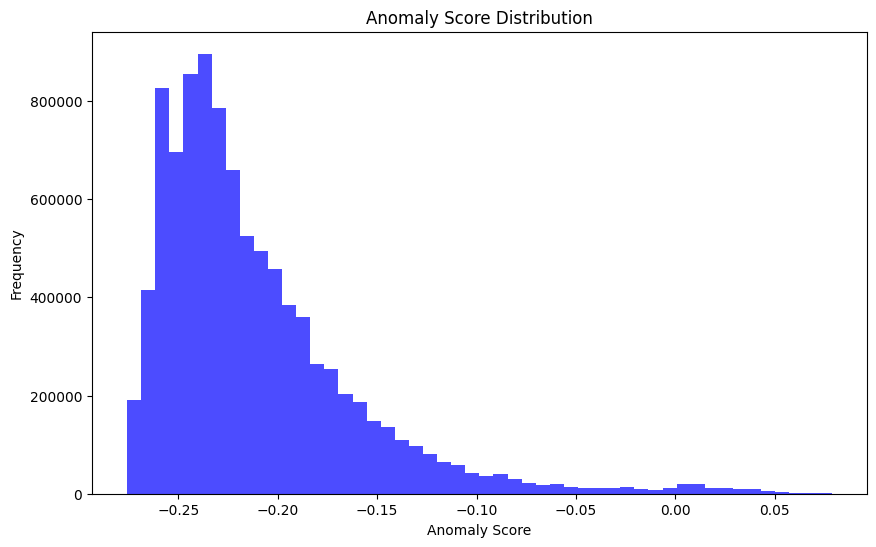

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(p2_df['anomaly_score'], bins=50, color='blue', alpha=0.7)
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()